# Process subtypes for each aggregation type

In [14]:

from pathlib import Path

import matplotlib.pyplot as plt
import polars as pl

# Dossier où sont stockés les CSV
folder_path = Path('data/scopus')

# Initialiser un dictionnaire pour stocker les statistiques par discipline
stats_per_discipline = {}
detailed_stats_per_discipline = {}
agg_types = set()
subtypes = set()

# Liste des colonnes à charger pour éviter les erreurs (on exclut ici 'author_info')
cols_to_load = [
    'dc:identifier', 'prism:url',
    'prism:aggregationType', 'prism:eIssn', 'prism:issn', 
    'prism:issueIdentifier', 'prism:coverDisplayDate', 'subtypeDescription'
]

# Parcourir chaque fichier CSV dans le dossier
for file_path in folder_path.glob("*.csv"):
    try:
        # Lire le fichier CSV avec Polars en chargeant uniquement les colonnes nécessaires
        df = pl.read_csv(
            file_path,
            columns=cols_to_load,
            encoding="ISO-8859-1",
            ignore_errors=True
        )

        # Vérifier si la colonne 'prism:aggregationType' existe
        if 'prism:aggregationType' in df.columns and 'subtypeDescription' in df.columns:
            # Compter les occurrences de chaque type dans 'prism:aggregationType' en filtrant les valeurs None
            detailed_counts = {}
            for agg_type, subtype_desc in zip(df['prism:aggregationType'], df['subtypeDescription']) :
                if agg_type is not None and subtype_desc is not None:
                    agg_types.add(agg_type)
                    subtypes.add(subtype_desc)
                    if subtype_desc not in detailed_counts :
                        detailed_counts[subtype_desc] = {agg_type : 0}
                    if agg_type not in detailed_counts[subtype_desc] :
                        detailed_counts[subtype_desc][agg_type] = 0
                    detailed_counts[subtype_desc][agg_type] += 1
                    
            # Ajouter les résultats au dictionnaire avec le nom de la discipline
            discipline_name = file_path.stem  # Utiliser le nom du fichier sans extension comme nom de la discipline
            detailed_stats_per_discipline[discipline_name] = detailed_counts

    except Exception as e:
        print(f"Erreur lors de la lecture du fichier {file_path.name}: {e}")

In [115]:
agg_types = list(agg_types)
subtypes = list(subtypes)
subtypes.sort()
import random
colors = ['red','orange','teal','yellow','lime','green','darkgreen',
          'skyblue','cyan','blue','darkblue','indigo','purple','lavender',
          'brown','pink','magenta']
random.shuffle(colors)
colors_dict = {}
for i, subtype in enumerate(subtypes) :
    print(i)
    colors_dict[subtype] = colors[i]

for i in colors_dict :
    print(i, colors_dict[i])

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
Abstract Report lavender
Article red
Book darkgreen
Book Chapter indigo
Business Article darkblue
Conference Paper orange
Conference Review green
Data Paper magenta
Editorial pink
Erratum brown
Letter purple
Note cyan
Preprint skyblue
Report lime
Retracted teal
Review yellow
Short Survey blue


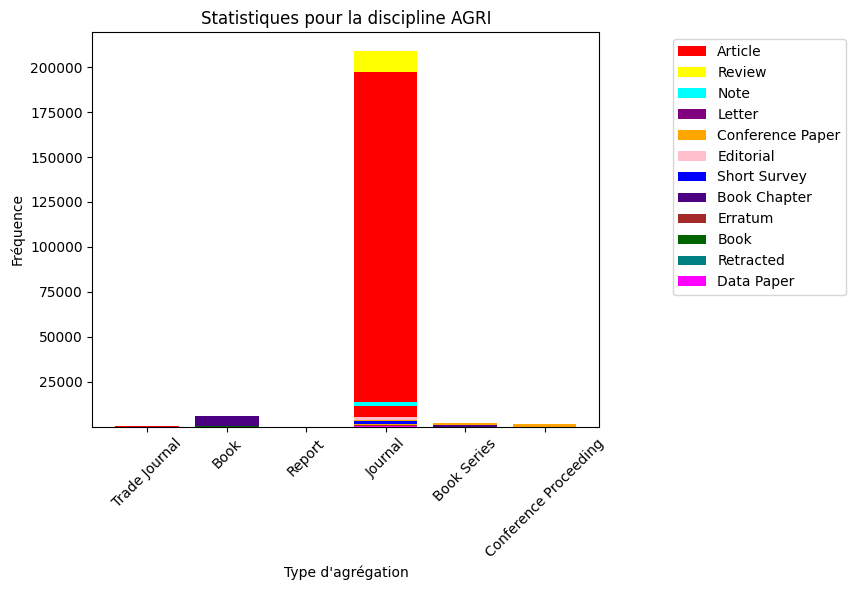

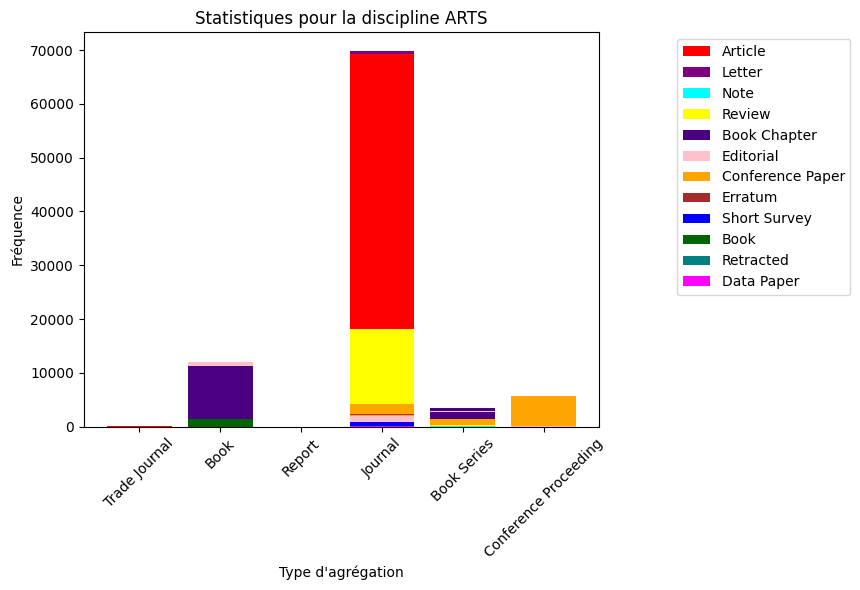

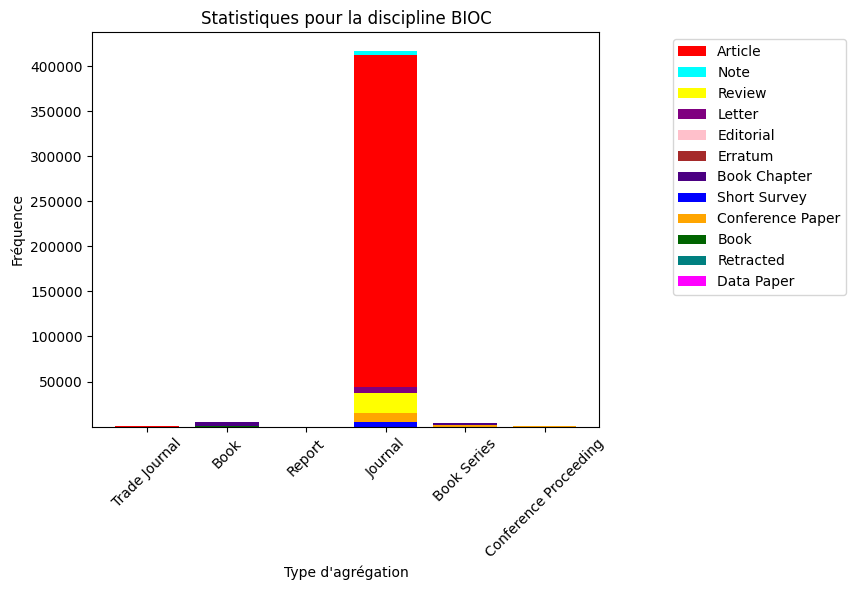

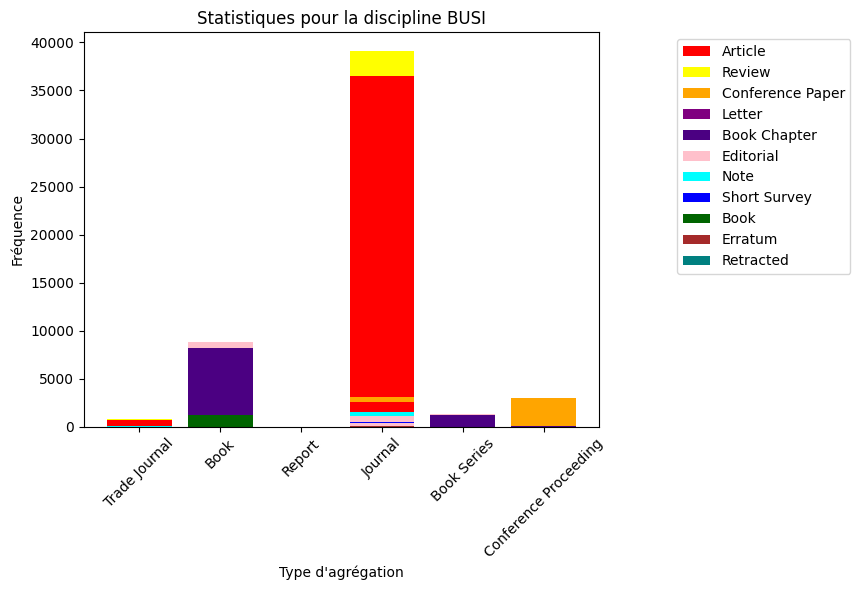

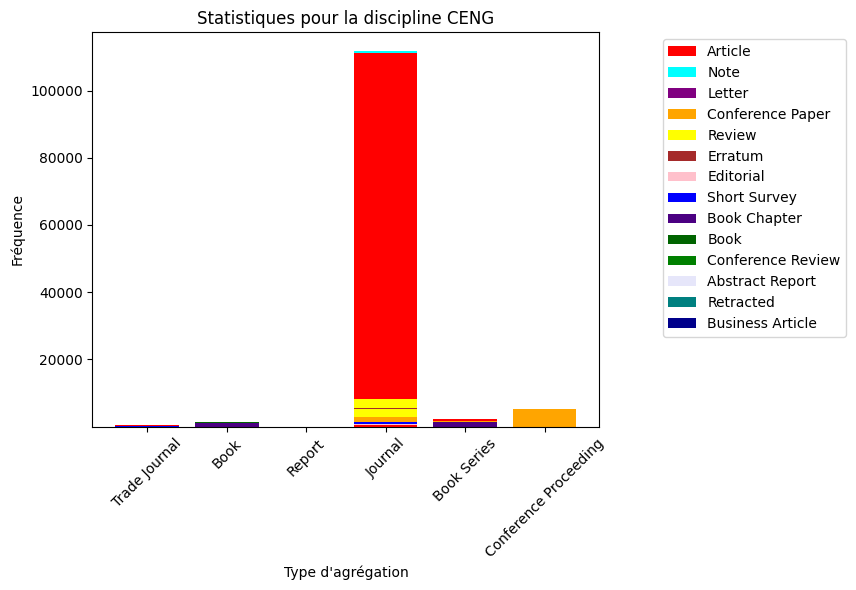

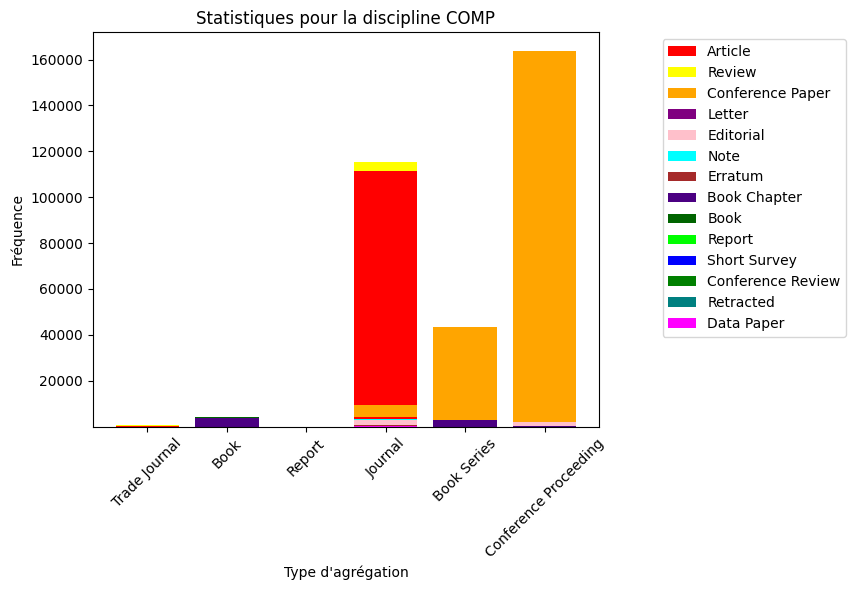

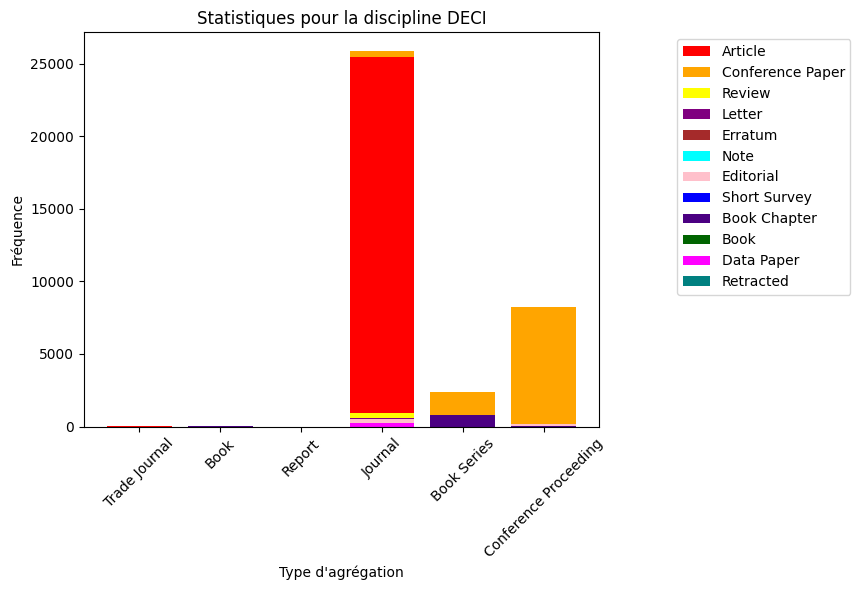

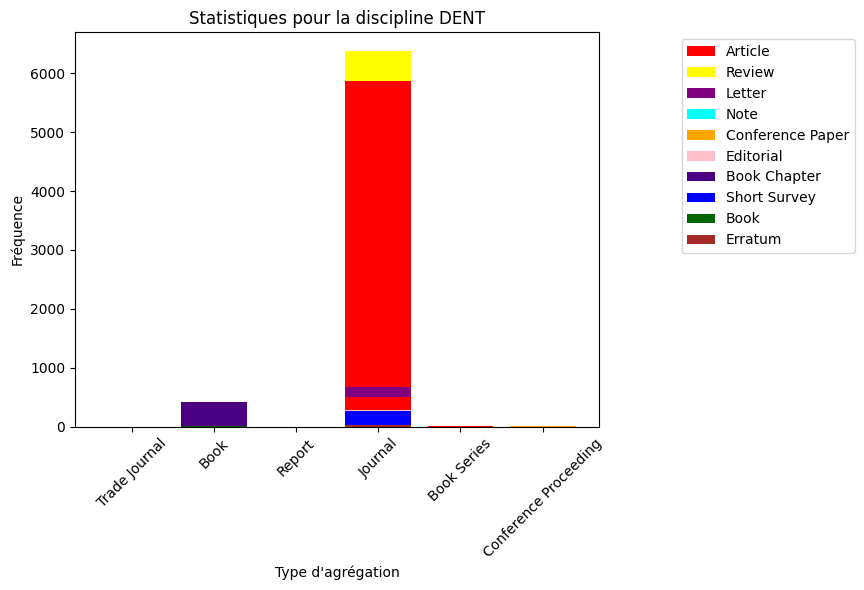

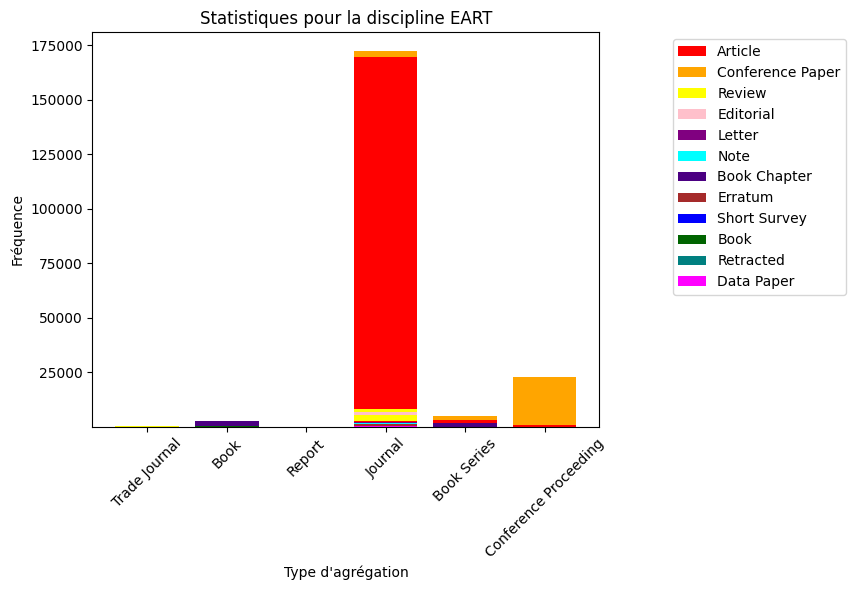

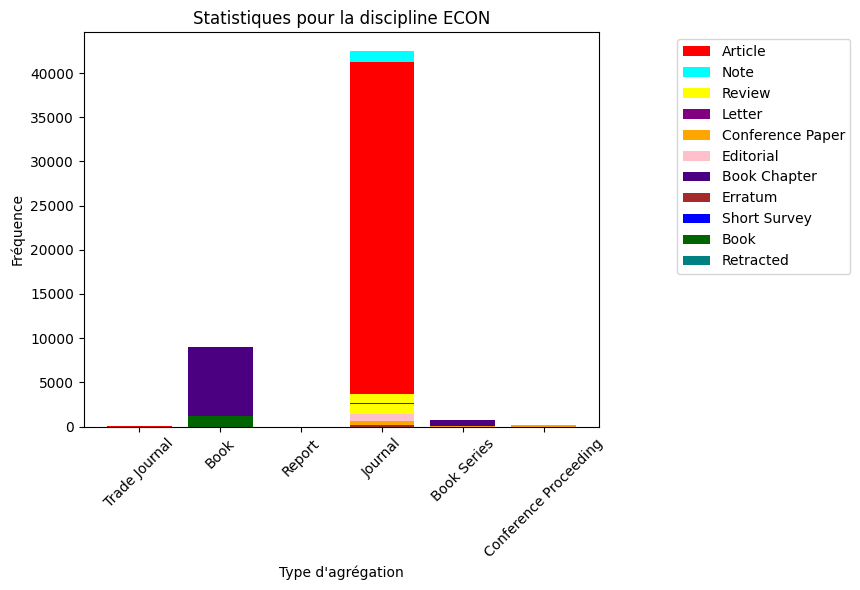

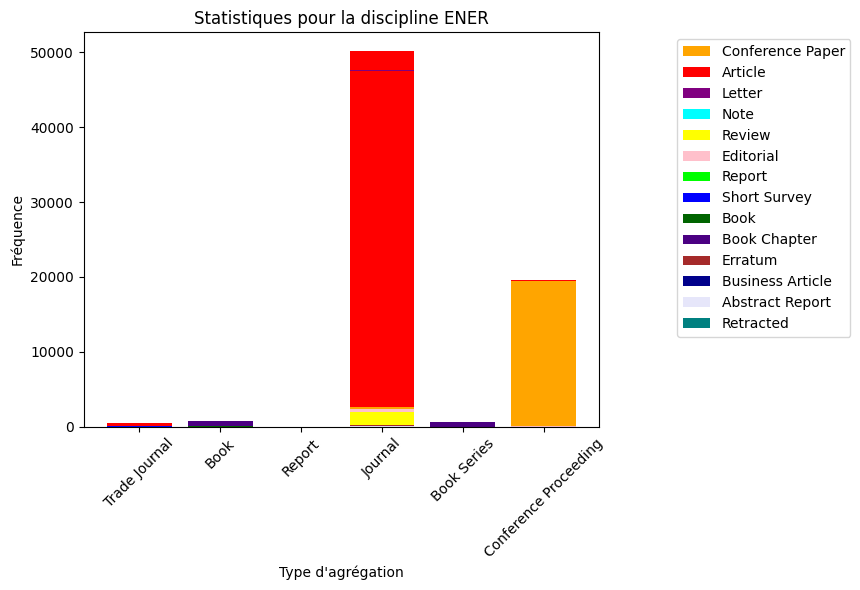

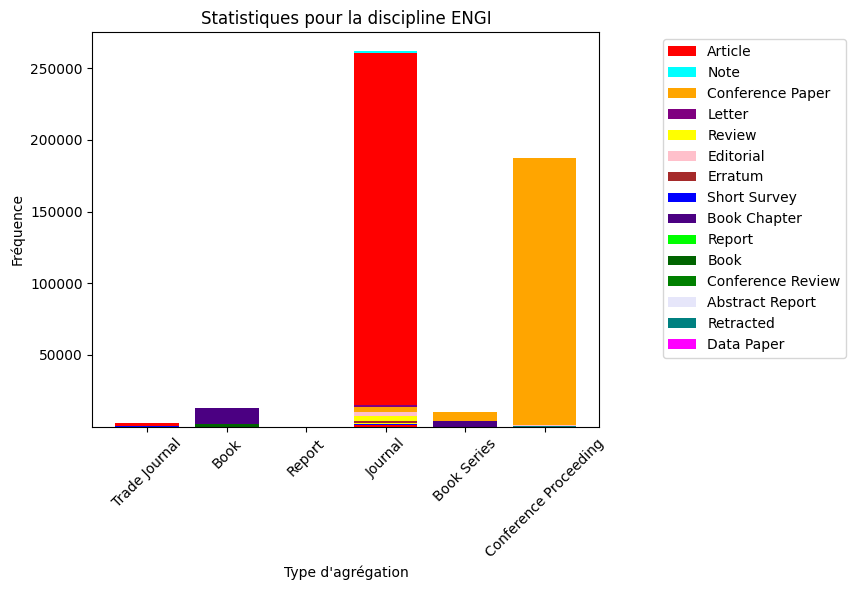

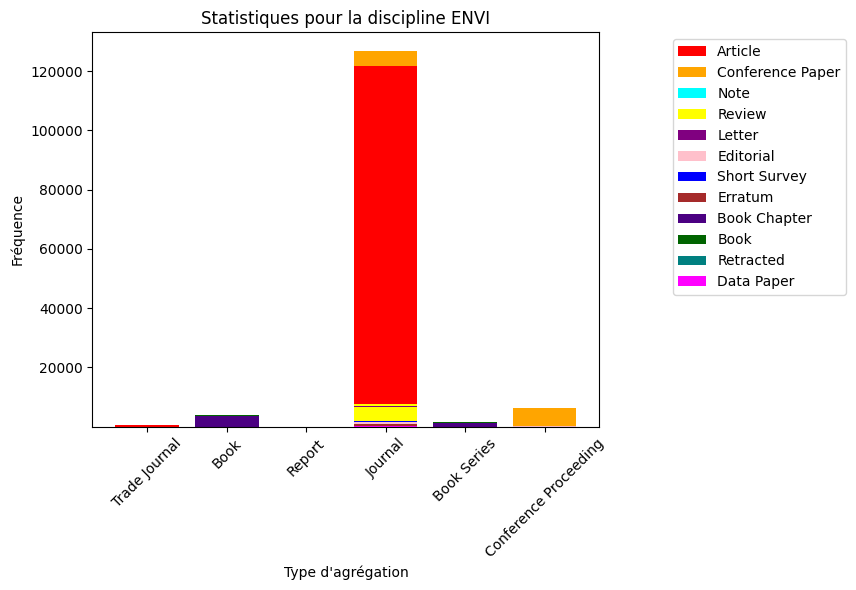

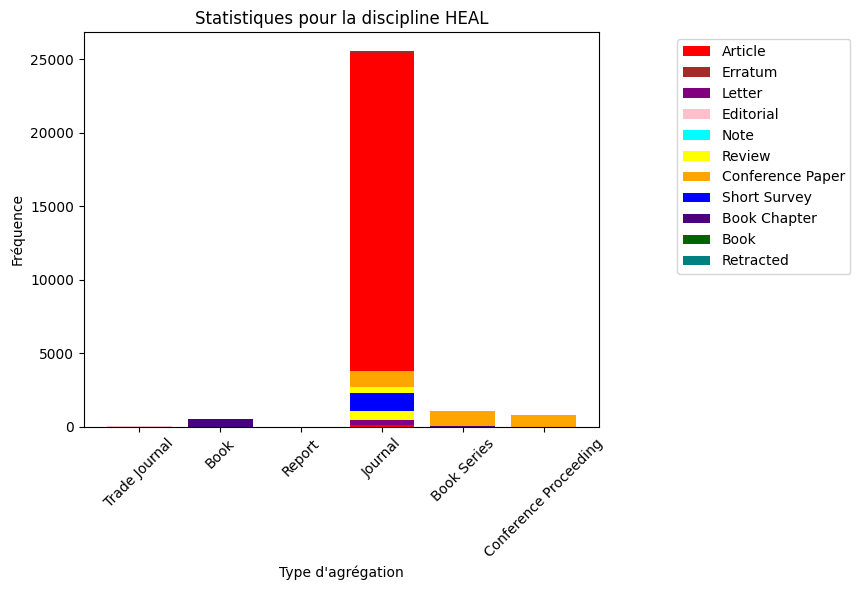

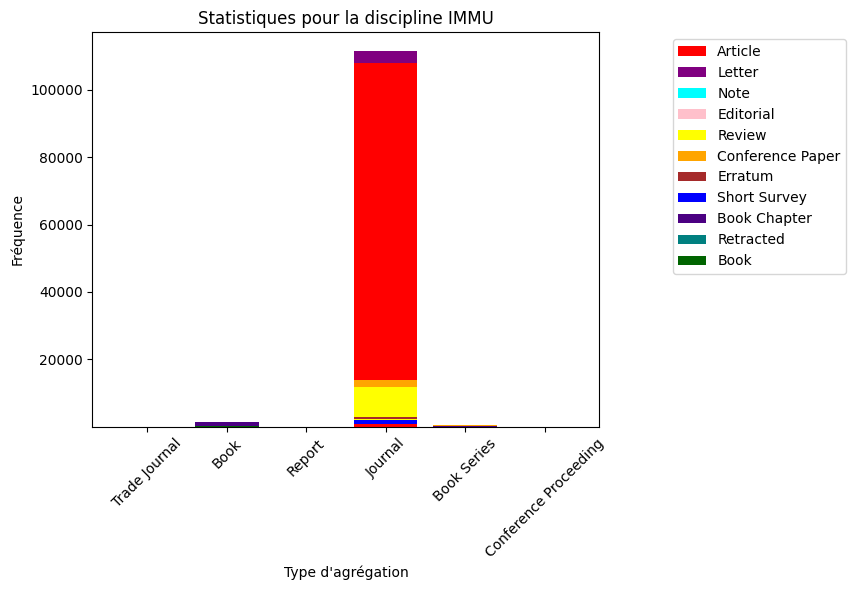

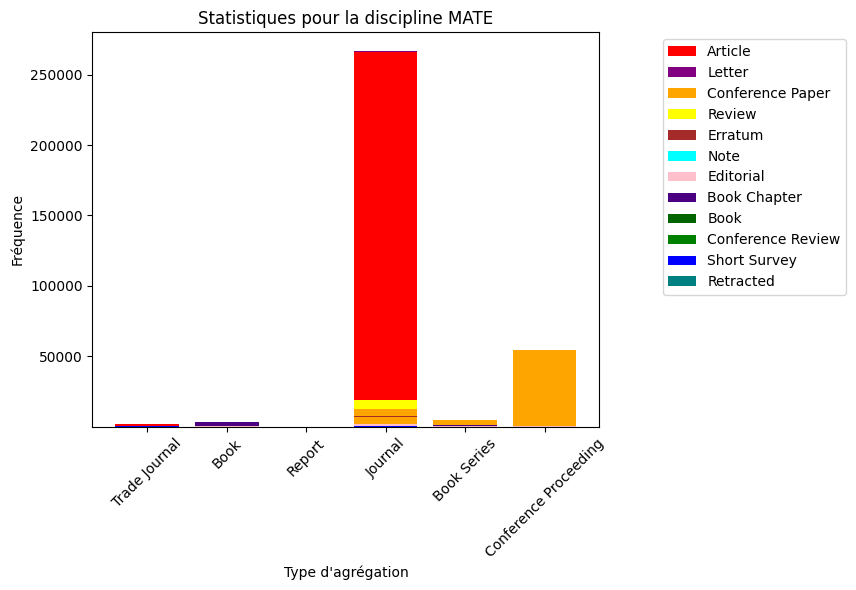

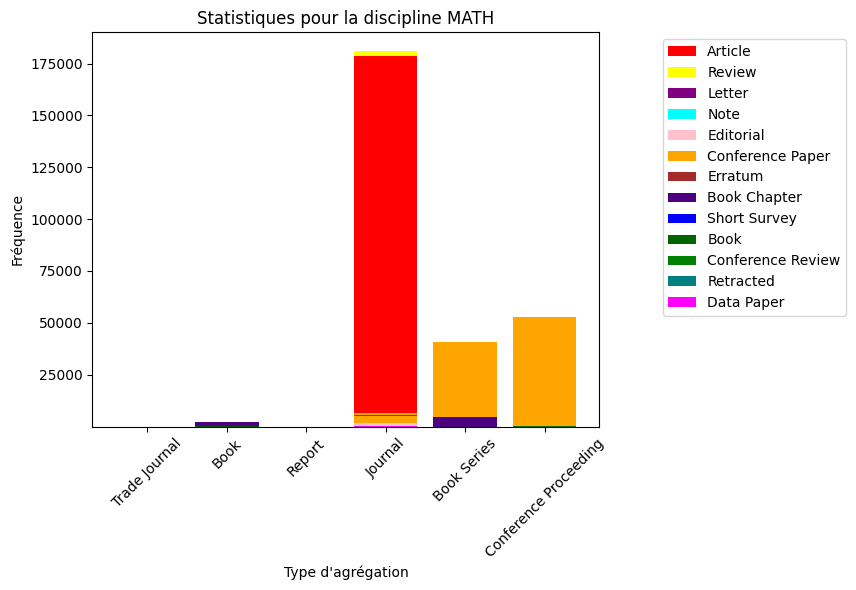

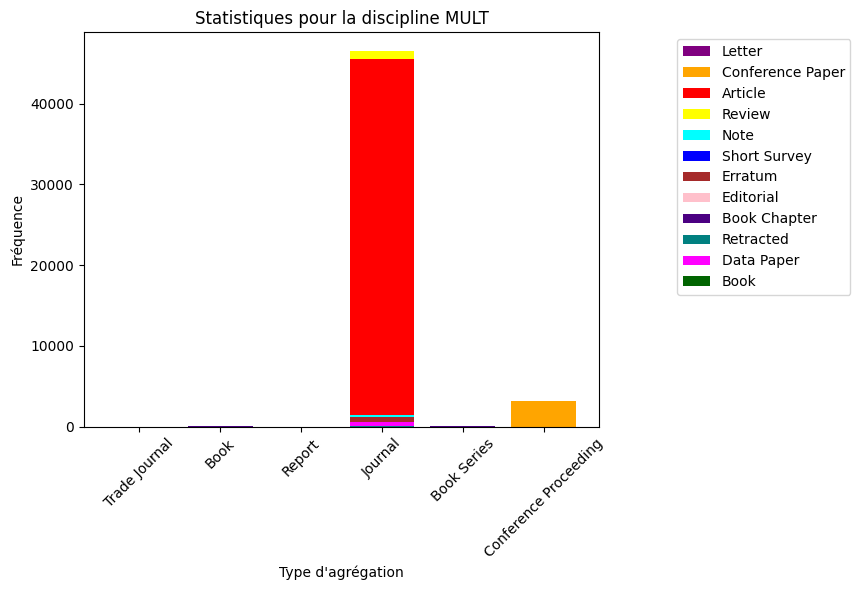

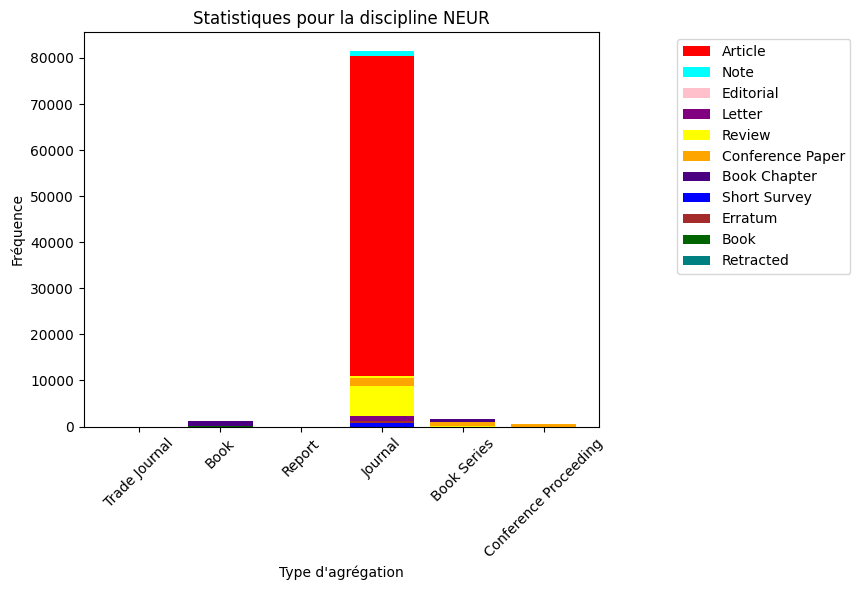

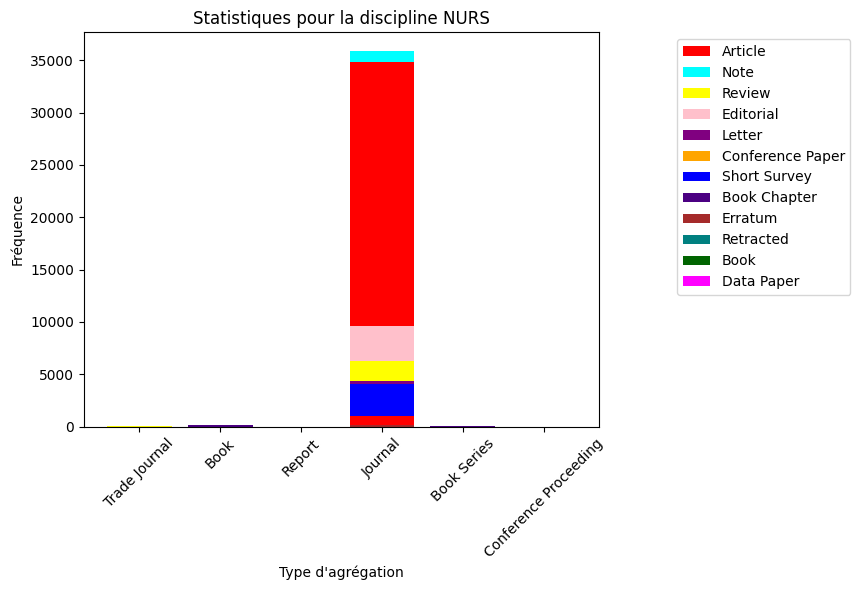

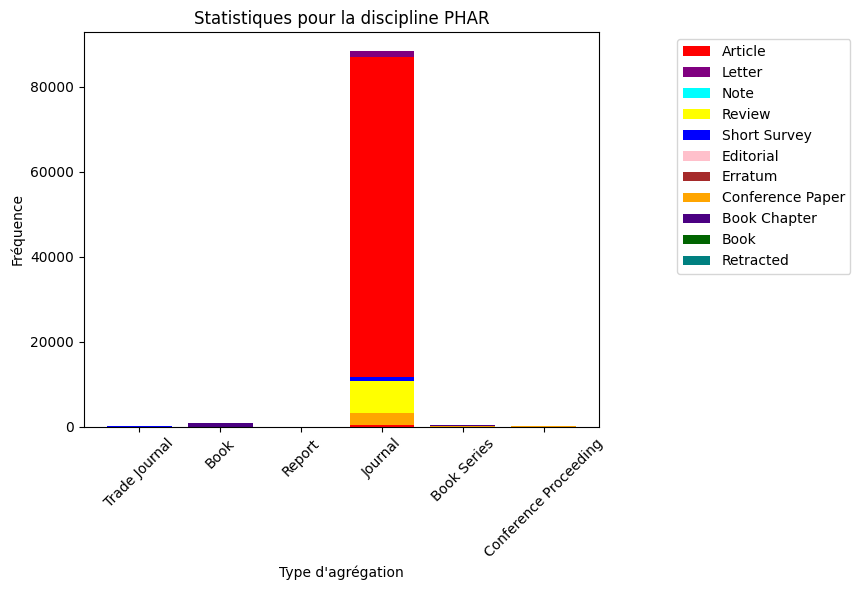

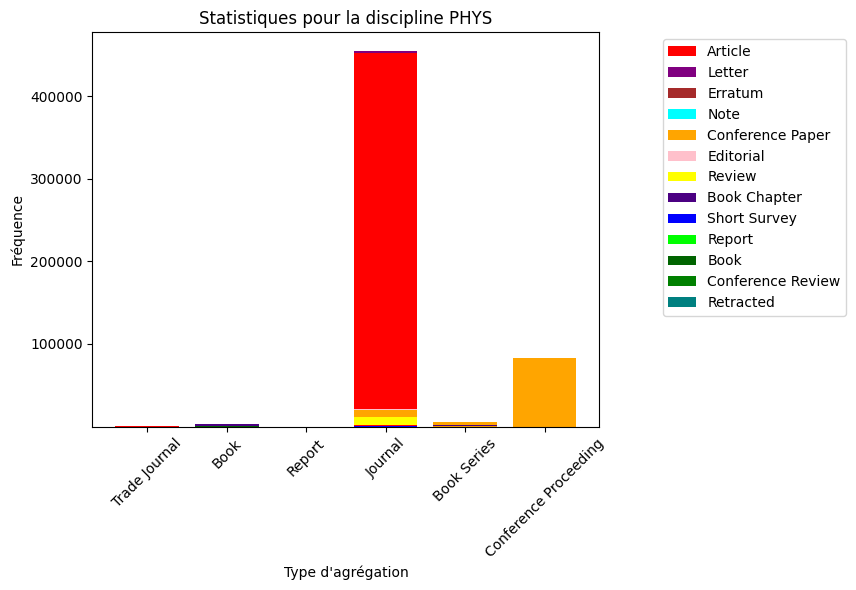

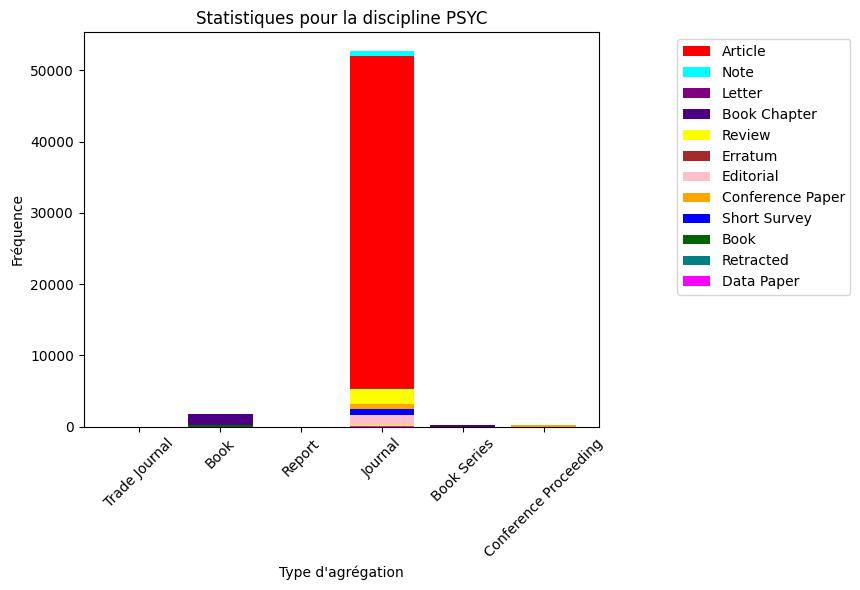

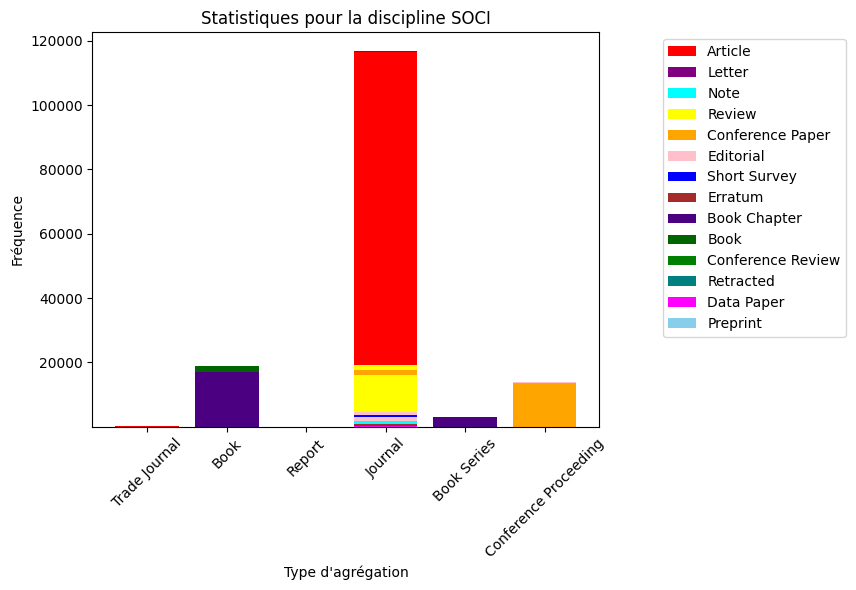

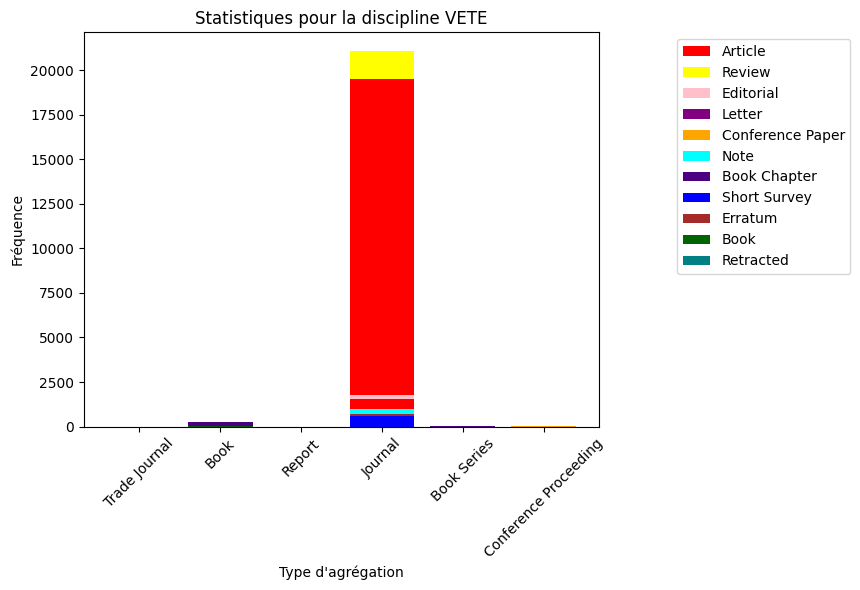

In [116]:
# Affichage des statistiques pour chaque discipline avec Matplotlib et print
for discipline, detailed_counts in list(detailed_stats_per_discipline.items()):
    # Créer le graphique
    plt.figure(figsize=(10, 6))
    
    previous = None
    for subtype in detailed_counts:
        subtype_count = [detailed_counts[subtype].get(agg_type, 0) for agg_type in agg_types]
        plt.bar(agg_types, subtype_count, bottom = previous, color=colors_dict[subtype])
        previous = subtype_count
        
    # with open("./detailed_counts/"+discipline+"_detailed_counts.txt",'w') as file :
    #     for agg_type in agg_types:
    #         print(agg_type, ":", file=file)
    #         for subtype in detailed_counts:
    #             print("\t", subtype, ":", detailed_counts[subtype].get(agg_type, 0), file=file)
    plt.legend(detailed_counts.keys(), bbox_to_anchor=(1.5, 1))
    plt.xlabel("Type d'agrégation")
    plt.ylabel("Fréquence")
    plt.title(f"Statistiques pour la discipline {discipline}")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.savefig("./detailed_counts/correct_figures/"+discipline+".png", bbox_inches='tight')
    plt.show()
